In [1]:
import pandas as pd

# Prepare the Data

In [2]:
# Import the data
startup_path = "https://static.bc-edx.com/mbc/ai/m4/datasets/start-up-success.csv"
df = pd.read_csv(startup_path)
df.head()

,Financial Performance,Industry Health,Firm Category
0,-2.761650,-2.414516,0
1,2.867162,1.989524,1
2,-0.701230,-1.074845,0
3,-3.516214,-1.928217,0
4,-0.981901,-2.798853,0


<Axes: xlabel='Industry Health', ylabel='Financial Performance'>

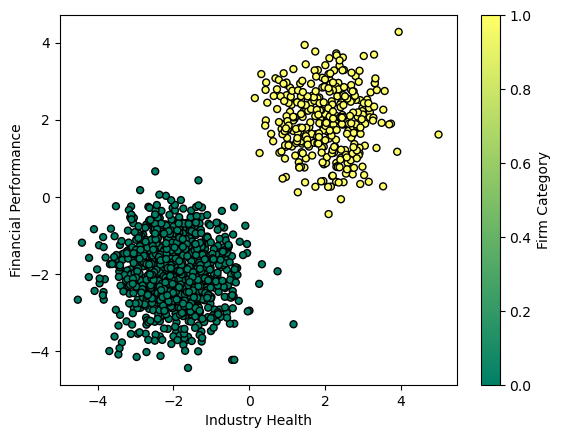

In [14]:
# Plot the data on a scatter plot
df.plot.scatter(
    x="Industry Health",
    y="Financial Performance",
    c="Firm Category",
    colormap="summer",
    marker="o",
    s=25,
    edgecolor='k'

)

In [15]:
# Preview the DataFrame
df.head()

,Financial Performance,Industry Health,Firm Category
0,-2.761650,-2.414516,0
1,2.867162,1.989524,1
2,-0.701230,-1.074845,0
3,-3.516214,-1.928217,0
4,-0.981901,-2.798853,0


In [16]:
# Check the number of unhealthy vs. healthy firms ('Firm Category')
# using value_counts
df['Firm Category'].value_counts()

0    978
1    346
Name: Firm Category, dtype: int64

# Split the data into training and testing sets

In [17]:
# Import Module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create the features DataFrame, X
X = df.copy()
X = X.drop(columns='Firm Category')

# Create the target DataFrame, y
y = df['Firm Category']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# Review the X_train DataFrame
X_train.head()

,Financial Performance,Industry Health
1094,-2.137153,-1.850450
343,1.963835,2.274277
827,-2.029103,-0.479377
49,2.633953,0.986314
311,-0.879506,-3.200142


# Model and Fit the Data to a Logistic Regression

In [21]:
# Import `LogisticRegression` from sklearn
from sklearn.linear_model import LogisticRegression


In [22]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()

In [23]:
# Fit the model
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


# Predict the Testing Labels

In [25]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
1094,0,0
343,1,1
827,0,0
49,1,1
311,0,0
...,...,...
1228,1,1
495,0,0
17,0,0
1061,0,0


In [26]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": y_test})
results_df

,Testing Data Predictions,Testing Data Actual Targets
35,0,0
396,1,1
608,1,1
1283,0,0
594,1,1
...,...,...
541,0,0
742,0,0
765,0,0
220,0,0


In [27]:
# Display the results DataFrame
results_df

,Testing Data Predictions,Testing Data Actual Targets
35,0,0
396,1,1
608,1,1
1283,0,0
594,1,1
...,...,...
541,0,0
742,0,0
765,0,0
220,0,0


In [28]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)


1.0